<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Inteligência Artificial (IA)
## Machine Learning
## Regressão Linear (Linear Regression)
## Parte 2

ATIVIDADE para entrega, vamos iniciar em aula e finalizar para entrega posteriormente.

Em duplas (pairing) escolher um conjunto de dados do link abaixo e criar uma visualização do algoritmo de Machine Learning Linear Regression com a lib Python para ML e IA scikit-learn.

- 10 open datasets for linear regression<br>
https://www.telusinternational.com/insights/ai-data/article/10-open-datasets-for-linear-regression

Utilizar MD para explicar os dados o código e a observação final<br>
Publicar o Jupyter Notebook do projeto em repo no GitHub, e enviar o link para o MS Teams (atividade)

---

# Análise: Dataset sobre qualidade psicosubjetiva de variantes do "Vinho Verde" Português
https://archive.ics.uci.edu/dataset/186/wine+quality

- ### Lucas Moreno Matheus - RM 97158
- ### Lucas Laia Manentti - RM 97709

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.linear_model import LinearRegression

### Importando Datasets

In [2]:
vinhos_vermelhos = pandas.read_csv("wine+quality/winequality-red.csv", sep=";")
vinhos_vermelhos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# vinhos_vermelhos.describe()

In [4]:
vinhos_brancos = pandas.read_csv("wine+quality/winequality-white.csv", sep=";")
vinhos_brancos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
# vinhos_brancos.describe()

### Definindo função para renderização dos gráficos

In [6]:
def correlacionar_qualidade(vinhos, coluna):
    x = np.array(vinhos[coluna]).reshape(-1, 1)
    y = np.array(vinhos["quality"])
    
    model = LinearRegression()
    model.fit(x, y)

    x_new = np.linspace(x.min(), x.max(), 100)
    y_new = model.predict(x_new[:, np.newaxis])

    plt.figure(figsize=(4, 3))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new, color='r')

    ax.set_title(f"{coluna.capitalize()} vs. Quality")
    ax.set_ylabel("Quality")
    ax.set_xlabel(coluna.capitalize())

    ax.axis('tight')

    plt.show()

## Correlação das caracteristicas do __Vinho Tinto__ com padrões de qualidade:

- A fixação da acidez **não interfere significativamente** na qualidade do vinho.
- Quanto maior a acidez volátil, **menor** a qualidade do vinho.
- Quanto mais cítrica for a acidez, **maior** será a qualidade do vinho.
- A quantidade de doçura **não interfere** diretamente na qualidade do vinho.
- A quantidade de cloretos no vinho **afeta** consideravelmente a qualidade.
- A quantidade de dióxido de enxofre **compromete** a qualidade do vinho.
- Quanto mais denso for o vinho, **menor** será a sua qualidade.
- Quanto mais álcool o vinho tiver, **melhor** ele será avaliado.

In [7]:
parametros = vinhos_vermelhos.columns.drop("quality").to_list()
parametros

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

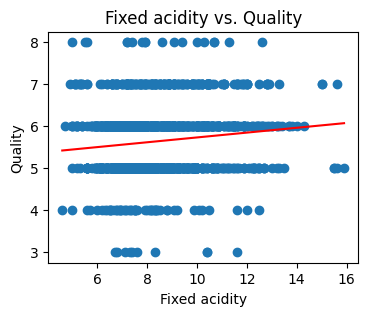

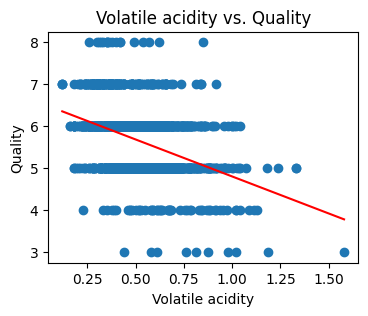

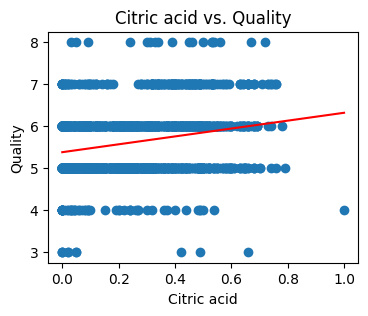

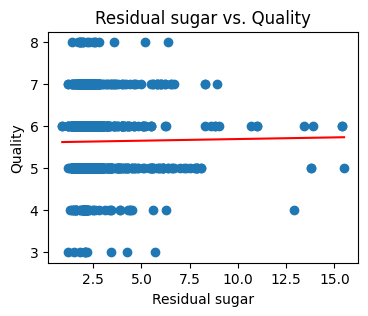

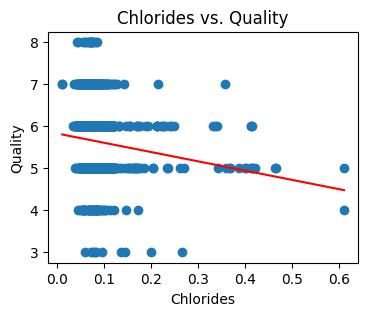

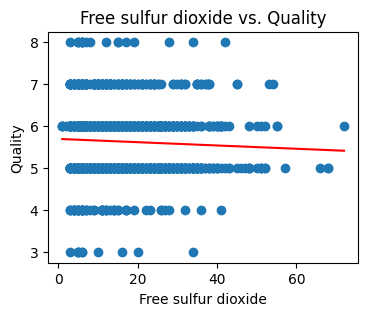

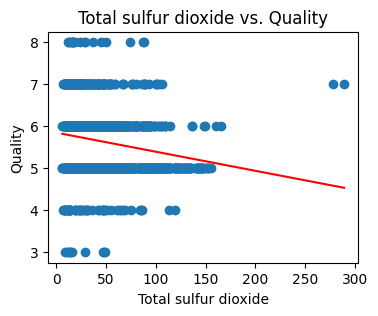

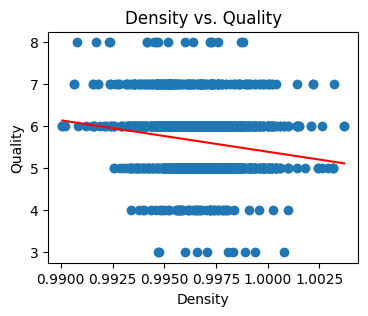

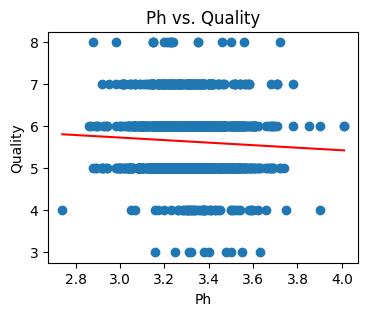

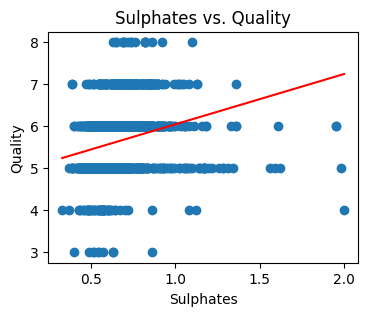

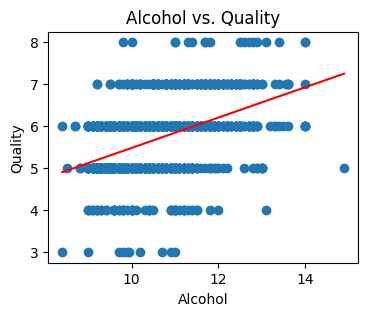

In [8]:
for param in parametros:
    correlacionar_qualidade(vinhos_vermelhos, param)

## Correlação das caracteristicas do __Vinho Branco__ com padrões de qualidade:

- A fixação da acidez **interfere** na qualidade do vinho.
- A acidez volátil, **não interfere muito** na qualidade do vinho.
- Quanto mais cítrica for a acidez, **maior** será a qualidade do vinho.
- Quanto mais açúcar no vinho, **interfere** diretamente na qualidade do vinho.
- A quantidade de cloretos no vinho **afeta** consideravelmente a qualidade, quanto mais menor a qualidade.
- A quantidade de dióxido de enxofre **compromete** significativamente a qualidade do vinho.
- Quanto mais denso for o vinho, **menor** será a sua qualidade.
- Quanto mais álcool o vinho tiver, **melhor** ele será avaliado.

In [9]:
parametros = vinhos_brancos.columns.drop("quality").to_list()
parametros

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

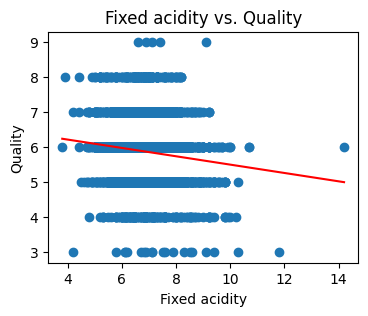

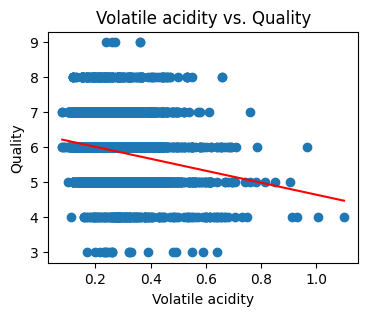

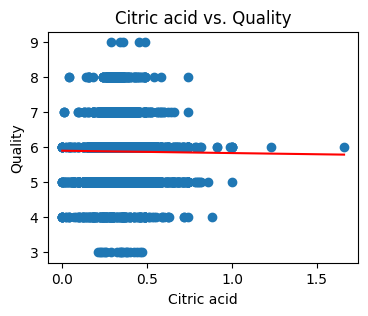

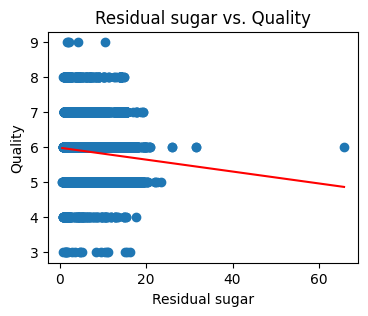

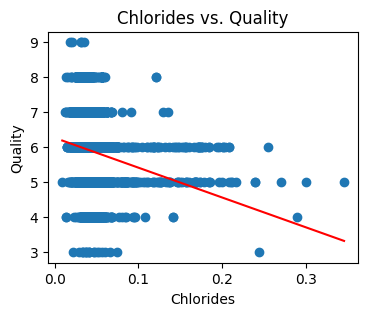

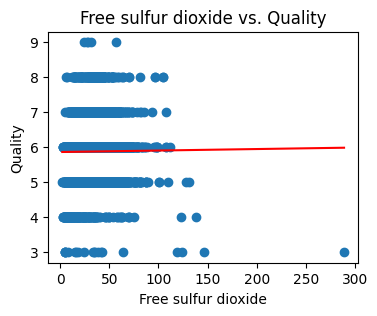

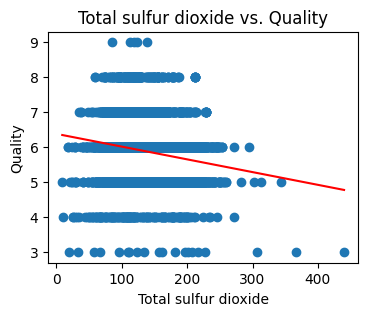

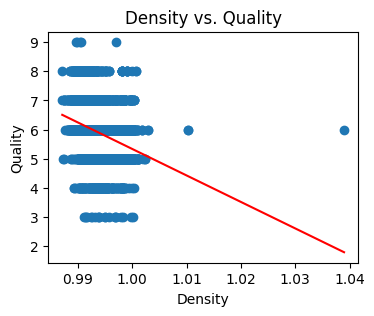

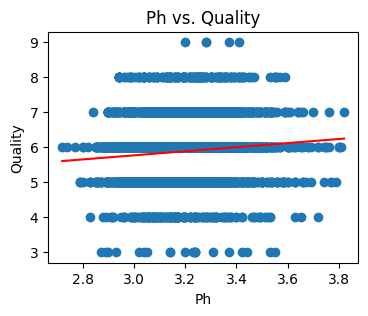

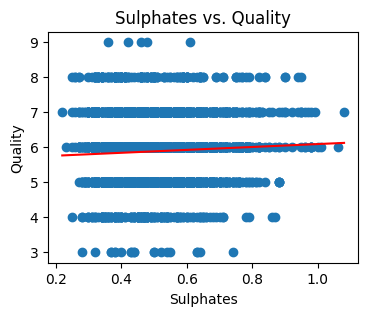

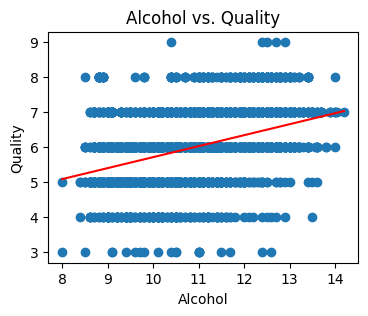

In [10]:
for param in parametros:
    correlacionar_qualidade(vinhos_brancos, param)

## Conclusão:
Concluímos que cada característica e cada substância presente em um vinho impacta significativamente sua qualidade e preço.